In [24]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Selection

In [25]:
financial_ratios_table = pd.read_csv('../../DATA/MODEL/training_data_temp.csv')

C:\Users\matus.rohal\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3433: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
# def sal_class_function(x):
#     if x is None or x != x or x < 50000: return "<50,000"
#     if x < 100000: return "00,050,000 - 100,000"
#     if x < 500000: return "00,100,000 - 500,000"
#     if x < 1000000: return '00,500,000 - 1,000,000'
#     if x < 3000000: return '01,000,000 - 3,000,000'
#     if x < 15000000: return '03,000,000 - 15,000,000'
#     if x < 30000000: return '15,000,000 - 30,000,000'
#     if x < 150000000: return '30,000,000 - 150,000,000'
#     return '>150,000,000'

def sal_class_function(x):
    if x is None or x != x or x <= 50000: return "0. <50,000"
    if x <= 2000000: return "1. Mikro"
    if x <= 10000000: return "2. Malý"
    if x <= 50000000: return "3. Stredný"
    return "4. Veľký"
    
financial_ratios_table['sal_class'] = financial_ratios_table['SAL'].apply(sal_class_function)

In [28]:
financial_ratios_table
display(financial_ratios_table.query('year == 2018')['sal_class'].value_counts())
display(financial_ratios_table.query('year == 2018')['sal_class'].value_counts(normalize=True))

0. <50,000    121786
1. Mikro       84603
2. Malý         7125
3. Stredný      1858
4. Veľký         412
Name: sal_class, dtype: int64

0. <50,000    0.564388
1. Mikro      0.392073
2. Malý       0.033019
3. Stredný    0.008610
4. Veľký      0.001909
Name: sal_class, dtype: float64

## Outliers

In [29]:
financial_ratios_table.query('sknace_division == sknace_division', inplace=True)

In [30]:

FINANCIAL_RATIOS = [
    'L3', 'L2', 'L1', 'CF_CL', 'CASH_TA', 'SAL_TA', 'TL_SAL',
    'INV_COST', 'INV_SAL', 'CC_SAL', 'TA_SAL',
    'TL_TA', 'CF_TL', 'CL_TA', 'NCL_TA', 'EQ_TL',
    'EQ_TA', 
    'EBIT_INT', 
    'CL_CC', 'ROE', 'EAT_TA',
    'ROA_BRUTTO', 'CF_TA', 'CF_SAL', 'ROS',
    'EAT_YIE', 'ROI', 'ROA_NETTO',
    'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']

PRIMARY_METRICS = [
    'CA',
    'CASH',
    'CL', 'EQ', 'NCL', 'TA', 'TL', 'CC',
    'INV',
    'CF_NETTO',
    'CF_SELFFIN',
    'EAT',
    'EBIT',
    'SAL', 'COST',
    'INT', 'YIE', 
]

SKNACE_DIVISIONS =  sorted(list(financial_ratios_table['sknace_division'].unique()))
YEARS = sorted(list(financial_ratios_table['year'].unique()))
SAL_CLASSES =  sorted(list(financial_ratios_table['sal_class'].unique()))
TEMPLATES = list(financial_ratios_table['financial_report_template_id'].unique())

In [31]:
financial_ratios_table_2018 = financial_ratios_table.query('year == 2018')
for sal_class in SAL_CLASSES:
    description_table = financial_ratios_table_2018.query('sal_class == @sal_class')[FINANCIAL_RATIOS].describe().T.sort_values('count')
    sample_size = financial_ratios_table_2018.query('sal_class == @sal_class').shape[0]
    description_table['share'] = description_table['count'] / sample_size
    display(description_table)


,count,mean,std,min,25%,50%,75%,max,share
EBIT_INT,20031.0,-248.520235,1.261323e+04,-9.159570e+05,-12.445204,0.799188,8.467787,6.946700e+05,0.164477
CL_CC,79589.0,281.492619,1.367579e+04,-8.175185e+05,0.445529,1.748252,9.235702,2.137416e+06,0.653515
SOCLIAB_SAL,83672.0,0.287025,2.193792e+01,-1.120951e+02,0.000000,0.000000,0.016227,4.080160e+03,0.687041
ROS,83672.0,-16.206158,1.948724e+03,-3.299230e+05,-0.134138,0.023355,0.157750,1.332748e+05,0.687041
CF_SAL,83672.0,-13.865957,1.919335e+03,-3.284070e+05,-0.048546,0.072675,0.292363,1.332748e+05,0.687041
TL_SAL,83672.0,563.324783,4.966393e+04,-7.538000e+02,0.097500,0.377383,1.619192,1.133036e+07,0.687041
INV_SAL,83672.0,25059.019930,3.980294e+06,-2.414979e+04,0.000000,0.000000,0.000000,1.044458e+09,0.687041
CC_SAL,83672.0,83.275466,7.223451e+03,-1.768042e+02,0.005338,0.098602,0.395522,1.590741e+06,0.687041
TA_SAL,83672.0,201075.945853,1.659762e+07,-8.949600e+05,210.515885,431.157243,1155.176103,3.553577e+09,0.687041
LABOR_PRODUCTIVITY,83672.0,1.451997,2.976446e+02,-1.888623e+01,0.000000,0.000000,0.202597,8.599800e+04,0.687041


,count,mean,std,min,25%,50%,75%,max,share
EBIT_INT,46190.0,275.073375,12690.001097,-1.183576e+06,0.372316,4.833834,26.623967,7.734150e+05,0.545962
ROE,71386.0,-0.929735,91.249786,-1.883067e+04,0.019155,0.161523,0.405959,3.539782e+03,0.843776
CL_CC,81634.0,42.410548,1613.294175,-3.362060e+05,0.762071,1.633621,4.576576,1.063148e+05,0.964907
L3,83892.0,22.440128,3304.572092,-9.731382e+01,0.844356,1.492682,3.512210,9.357865e+05,0.991596
L2,83892.0,10.670293,577.201723,-1.114500e+03,0.584124,1.257067,3.071741,1.264815e+05,0.991596
L1,83892.0,5.576047,263.982093,-1.249750e+03,0.111829,0.482627,1.631439,5.601490e+04,0.991596
CF_CL,83892.0,-0.943823,748.645804,-2.137170e+05,0.047302,0.283304,1.096572,1.419411e+04,0.991596
CF_TL,84069.0,-1.510059,737.399857,-2.137170e+05,0.034678,0.181575,0.613262,2.005103e+03,0.993688
EQ_TL,84069.0,6.166757,251.147225,-3.345303e+02,0.087419,0.468834,1.773628,6.631111e+04,0.993688
ROA_NETTO,84503.0,-0.598768,82.821278,-2.101750e+04,-0.004243,0.037653,0.143395,4.765057e+02,0.998818


,count,mean,std,min,25%,50%,75%,max,share
EBIT_INT,5836.0,2018.311768,36942.790672,-1.088903e+06,2.066050,9.456338,50.161045,1.271865e+06,0.819088
ROE,6649.0,-0.088089,11.643456,-6.753526e+02,0.036950,0.156002,0.378597,2.386519e+02,0.933193
CL_CC,7095.0,7.676924,116.293655,-6.350922e+00,0.712080,1.142030,2.178477,6.433080e+03,0.995789
L3,7117.0,5.311170,98.387430,-3.830577e+01,1.020541,1.483898,2.608092,6.147168e+03,0.998877
L2,7117.0,4.367647,92.305508,-1.231560e+00,0.714895,1.150593,2.032229,6.147168e+03,0.998877
L1,7117.0,1.622281,65.727378,-7.077893e+02,0.034568,0.164285,0.577320,5.453275e+03,0.998877
CF_CL,7117.0,0.652933,40.600302,-1.731102e+03,0.094210,0.285452,0.742397,2.394091e+03,0.998877
CF_TL,7121.0,0.255702,17.511351,-9.759864e+02,0.061381,0.169710,0.404648,4.251450e+02,0.999439
EQ_TL,7121.0,2.238411,31.244090,-1.122990e+00,0.144857,0.443969,1.217612,1.910848e+03,0.999439
ROA_NETTO,7124.0,-0.003387,4.599112,-3.854521e+02,0.005424,0.039026,0.106394,2.351939e+01,0.999860


,count,mean,std,min,25%,50%,75%,max,share
EBIT_INT,1691.0,8336.345893,151996.433195,-322361.416667,1.966885,9.953990,58.650157,5.706905e+06,0.910118
ROE,1773.0,0.084831,1.699380,-45.324116,0.030030,0.124172,0.303404,2.215195e+01,0.954252
CL_CC,1855.0,4.969644,55.027301,0.001699,0.676588,1.044408,1.913302,1.389690e+03,0.998385
EQ_TL,1857.0,1.220461,2.751559,-0.962481,0.183261,0.475892,1.191439,5.142658e+01,0.999462
CF_TL,1857.0,0.037723,9.291430,-346.658217,0.055438,0.153681,0.350977,2.333058e+01,0.999462
INV_COST,1857.0,31.098840,44.589165,-2.592996,1.171539,16.056274,46.102297,5.910841e+02,0.999462
L3,1857.0,2.841167,14.249136,0.030894,1.097602,1.622195,2.625721,5.911571e+02,0.999462
CF_CL,1857.0,0.053651,18.978635,-786.859127,0.086820,0.270372,0.658125,4.714510e+01,0.999462
L1,1857.0,0.522308,1.800804,-0.696223,0.016031,0.101738,0.411748,4.305292e+01,0.999462
L2,1857.0,2.253680,14.201139,0.025856,0.714479,1.202976,1.938590,5.911571e+02,0.999462


,count,mean,std,min,25%,50%,75%,max,share
EBIT_INT,386.0,11037.310645,168442.127276,-436.272975,2.817752,14.899559,89.056134,3.276701e+06,0.936893
ROE,405.0,0.008331,1.773443,-31.482908,0.039593,0.126255,0.281406,1.064444e+00,0.983010
L3,412.0,2.146252,2.997255,0.098492,1.130432,1.600402,2.483320,5.463960e+01,1.000000
ROA_NETTO,412.0,0.040409,0.194852,-3.354311,0.007811,0.038581,0.092128,4.294105e-01,1.000000
ROI,412.0,0.046817,0.194538,-3.354311,0.016450,0.045718,0.099120,4.313659e-01,1.000000
EAT_YIE,412.0,0.020753,0.045565,-0.146243,0.003002,0.015184,0.033628,2.647423e-01,1.000000
ROS,412.0,0.021548,0.048420,-0.190345,0.003196,0.015674,0.034581,2.811378e-01,1.000000
CF_SAL,412.0,0.055351,0.072127,-0.177431,0.014769,0.040994,0.074195,4.787158e-01,1.000000
CF_TA,412.0,0.096651,0.205826,-3.329624,0.041369,0.092184,0.160112,5.778377e-01,1.000000
ROA_BRUTTO,412.0,0.058325,0.204089,-3.353257,0.010990,0.051385,0.119987,5.387022e-01,1.000000


In [32]:
FINANCIAL_RATIOS.remove('EBIT_INT')

In [33]:
from sklearn.impute import SimpleImputer


def fill_missing_values_mean(data):
    # Instantiate SimpleImputer with mean strategy
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the data and transform the data
    imputed_data = imputer.fit_transform(data)

    return imputed_data


In [42]:
import sys

def mahalanobis_distance(data):
    """
    Calculate Mahalanobis Distance for each data point in a multivariate dataset.
    
    # Parameters:
        data (DataFrame): Input DataFrame containing numerical columns.
        
    Returns:
        distances (Series): Mahalanobis Distance for each data point.
    """

    data = data.drop(columns = ['L2'])

    normalized_data = pd.DataFrame(fill_missing_values_mean(data), columns=data.columns, index=data.index)
    # Normalize the data
    # normalized_data = (imputed_data - imputed_data.mean()) / imputed_data.std()

    # Calculate mean vector
    mean_vector = normalized_data.mean()

    # Calculate covariance matrix
    covariance_matrix = normalized_data.cov()

    # Check if covariance matrix is singular
    if np.linalg.cond(covariance_matrix) > 1/sys.float_info.epsilon:
        # Covariance matrix is singular, apply regularization
        regularization = 1e-6  # Adjust regularization parameter as needed
        covariance_matrix += regularization * np.eye(len(data.columns))

    # Calculate inverse covariance matrix
    try:
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)

        # Calculate Mahalanobis Distance for each data point
        distances = []
        for index, row in normalized_data.iterrows():
            diff = row - mean_vector
            distance = np.sqrt(np.abs(diff.dot(inv_covariance_matrix).dot(diff)))
            distances.append(distance)

        return pd.Series(distances, index=data.index)
    
    except np.linalg.LinAlgError:
        display(data.shape)
        display(data)
        display(normalized_data)

def flag_outliers_mahalanobis(data, threshold=3):
    """
    Flag outliers in a DataFrame using Mahalanobis Distance method.
    
    Parameters:
        data (DataFrame): Input DataFrame containing numerical columns.
        threshold (float): Threshold for identifying outliers based on Mahalanobis Distance.
        
    Returns:
        outliers (Series): Boolean Series indicating whether each data point is an outlier.
    """
    # Calculate Mahalanobis Distance for each data point
    distances = mahalanobis_distance(data)

    # Determine threshold based on chi-square distribution
    chi2_threshold = threshold ** 2
    try:
        cutoff = np.percentile(distances, 100 * (1 - np.exp(-chi2_threshold / 2)))

        # Flag outliers
        outliers = distances > cutoff

        return outliers
    except TypeError:
        print(chi2_threshold)
        print(threshold)
        display(distances)
        display(data)

outlier_boolean_1 = pd.DataFrame()
for year in YEARS:
    for sal_class in SAL_CLASSES:
        subset = financial_ratios_table.query('period_length == 12 and sal_class == @sal_class and year == @year').set_index(['entity_ico', 'year'])[FINANCIAL_RATIOS]
        if subset.shape[0] < 2:
            outlier_boolean_1 = pd.concat([
                outlier_boolean_1,
                subset.reset_index()[['entity_ico', 'year']]
            ], axis=0)
            continue
        outlier_boolean_1 = pd.concat([
            outlier_boolean_1,
            flag_outliers_mahalanobis(subset).to_frame(name = 'is_outlier').reset_index()
        ], axis=0)
        
display(outlier_boolean_1['is_outlier'].value_counts())



False    1568287
True       17637
Name: is_outlier, dtype: int64

In [43]:
display(financial_ratios_table.shape)

financial_ratios_table = financial_ratios_table.merge(outlier_boolean_1, on = ['entity_ico', 'year'], how = 'left')

display(financial_ratios_table.shape)
display(financial_ratios_table)

(1679947, 160)

(1679947, 161)

,financial_report_id,financial_statement_id,financial_report_order_number,entity_id,approved_date,entity_ico,year,month,financial_report_template_id,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,period_length,financial_report_id.1,financial_report_template_id.1,total_assets,non_current_assets,intangible_assets,total_non_current_tangible_assets,land_and_buildings,separate_movable_assets_and_sets_of_movable_assets,other_long_term_tangible_assets,adjustment_item_for_acquired_assets,total_long_term_financial_assets,bank_balances_with_maturity_longer_than_one_year,current_assets,inventories,non_current_claims,current_claims,trade_receivables,social_security_tax_receivables_and_grants,financial_assets,other_financial_accounts,cash_and_bank_balances,total_owners_equity_and_liabilities,owners_equity,share_capital,share_capital_and_changes_in_share_capital,claims_for_subscribed_owners_equity,capital_funds,valuation_differences,undivided_profit_or_unpaid_loss_from_previous_years,profit_for_the_reporting_period_after_tax,liabilities,long_term_liabilities_excluding_reserves_and_loans,long_term_reserves,long_term_bank_loans,total_short_term_liabilities_excluding_reserves_loans_and_advances,...,L2,L1,CF_CL,CASH_TA,SAL_TA,TL_SAL,INV_COST,INV_SAL,CC_SAL,TA_SAL,TL_TA,CF_TL,CL_TA,NCL_TA,EQ_TL,EQ_TA,EBIT_INT,CL_CC,ROE,EAT_TA,ROA_BRUTTO,CF_TA,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,SOCLIAB_SAL,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled,DPHZ_vat_registration_cancelled_1y_off,DPHZ_vat_registration_cancelled_2y_off,RUZ_indirect_criterion,RUZ_indirect_criterion_1y_off,RUZ_indirect_criterion_2y_off,RU_konkurz,RU_konkurz_1y_off,RU_konkurz_2y_off,RU_ostatne_konania,RU_ostatne_konania_1y_off,RU_ostatne_konania_2y_off,cancellation_year,RUZ_cancelled,RUZ_cancelled_1y_off,RUZ_cancelled_2y_off,sal_class,is_outlier
0,4890214,2575566,2,25527,2015-07-31,671.0,2014,1,699.0,"Kerametal, akciová spoločnosť,",1970-02-02,NaN,46180.0,NaN,12,4890214,699.0,5175248.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,0.0,5174843.0,0.0,0.0,5173364.0,5173364.0,0.0,1479.0,0.0,1479.0,5175248.0,3807863.0,10884786.0,10884786.0,0.0,-6657984.0,131090.0,131090.0,-550029.0,1367385.0,1255.0,0.0,0.0,1366130.0,...,3.787958,0.001083,-0.400976,0.000286,0.001227,215.336220,0.0,0.0,814.702992,293399.886614,0.264216,-0.400608,0.263974,0.000243,2.784778,0.735784,NaN,2.640700e-01,-0.144446,-0.106281,-0.106188,-0.105847,-86.265512,-86.618740,-49.939078,-0.106281,-0.106281,0.217953,6.666929,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,"0. <50,000",False
1,5392251,2976863,2,25527,2016-12-31,671.0,2015,1,699.0,"Kerametal, akciová spoločnosť, Bratislava",1970-02-02,NaN,46180.0,NaN,12,5392251,699.0,5174845.0,222.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0,0.0,5174245.0,0.0,0.0,5172377.0,5172377.0,0.0,1868.0,0.0,1868.0,5174845.0,3480567.0,10884786.0,10884786.0,0.0,-7076917.0,0.0,0.0,-327302.0,1694278.0,1255.0,0.0,0.0,1693023.0,...,3.056217,0.001103,-0.193040,0.000361,0.000702,466.357831,0.0,0.0,1423.720617,512783.980182,0.327407,-0.192898,0.327164,0.000243,2.054307,0.672593,NaN,3.273201e-01,-0.094037,-0.063249,-0.063156,-0.063156,-89.959262,-90.091385,-32.236974,-0.063249,-0.063249,0.000000,11.652904,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,"0. <50,000",False
2,5887438,3375702,2,25527,2017-12-27,671.0,2016,1,699.0,"Kerametal, akciová spoločnosť, Bratislava",1970-02-02,NaN,46180.0,NaN,12,5887438,699.0,14901.0,222.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0,0.0,14679.0,0.0,0.0,13645.0,13645.0,0.0,1034.0,0.0,1034.0,14901.0,-1683081.0,10884786.0,10884786.0,0.0,-7383074.0,-21145.0,-21145.0,-5163648.0,1697982.0,0.0,0.0,0.0,1697982.0,...,0.008645,0.000609,-3.040767,0.069391,0.133817,851.545637,0.0,0.0,6.843029,2690.250752,113.950876,-3.040767,113.950876,0.000000,-0.991224,-112.950876,NaN,1.244399e+02,NaN,-346.5303

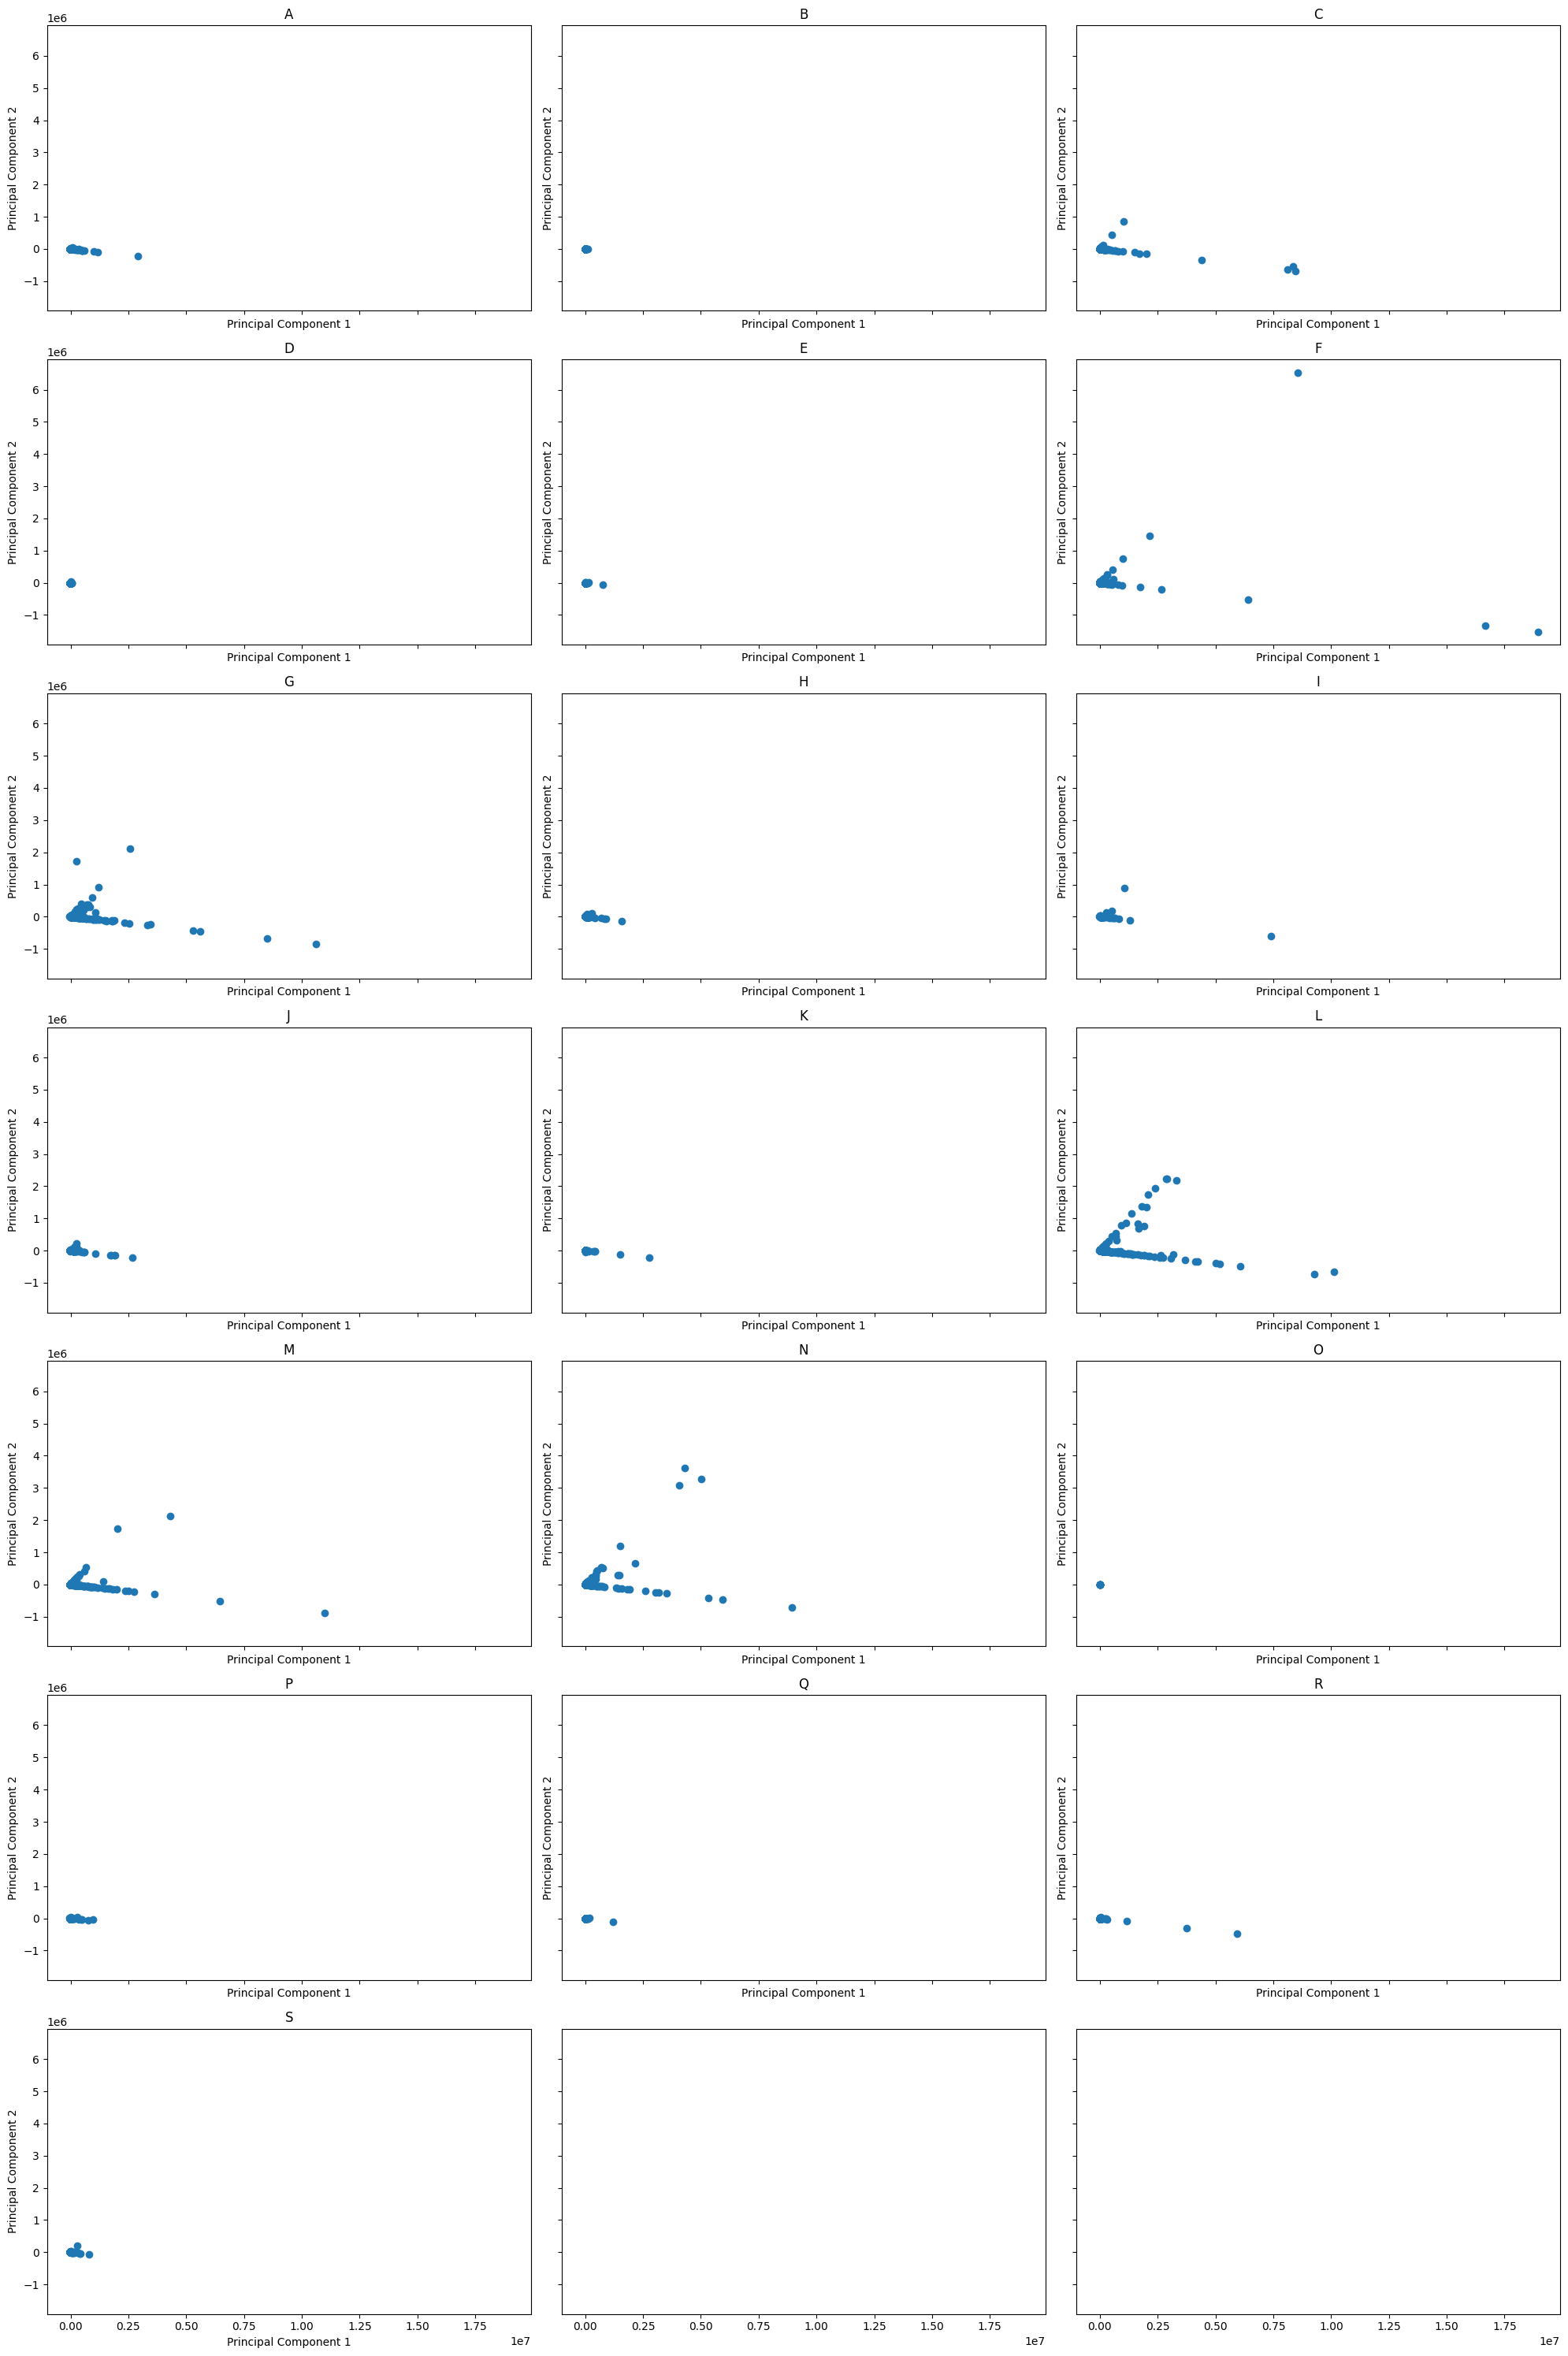

In [44]:
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt


fig, axes = plt.subplots(ncols=3, nrows=len(SKNACE_DIVISIONS) // 3 + 1, sharex=True, sharey=True, figsize=(20, 30))
axes = axes.flatten()

data_group = financial_ratios_table.query('year == 2018 and is_outlier == False')

data = fill_missing_values_mean(data_group[FINANCIAL_RATIOS].values)
            
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)


for i, sknace in enumerate(SKNACE_DIVISIONS):
    ax = axes[i]
    class_indices = data_group['sknace_division'] == sknace
    
    ax.scatter(pca_data[class_indices, 0], pca_data[class_indices, 1], label=sknace)

    ax.set_title(f'{sknace}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

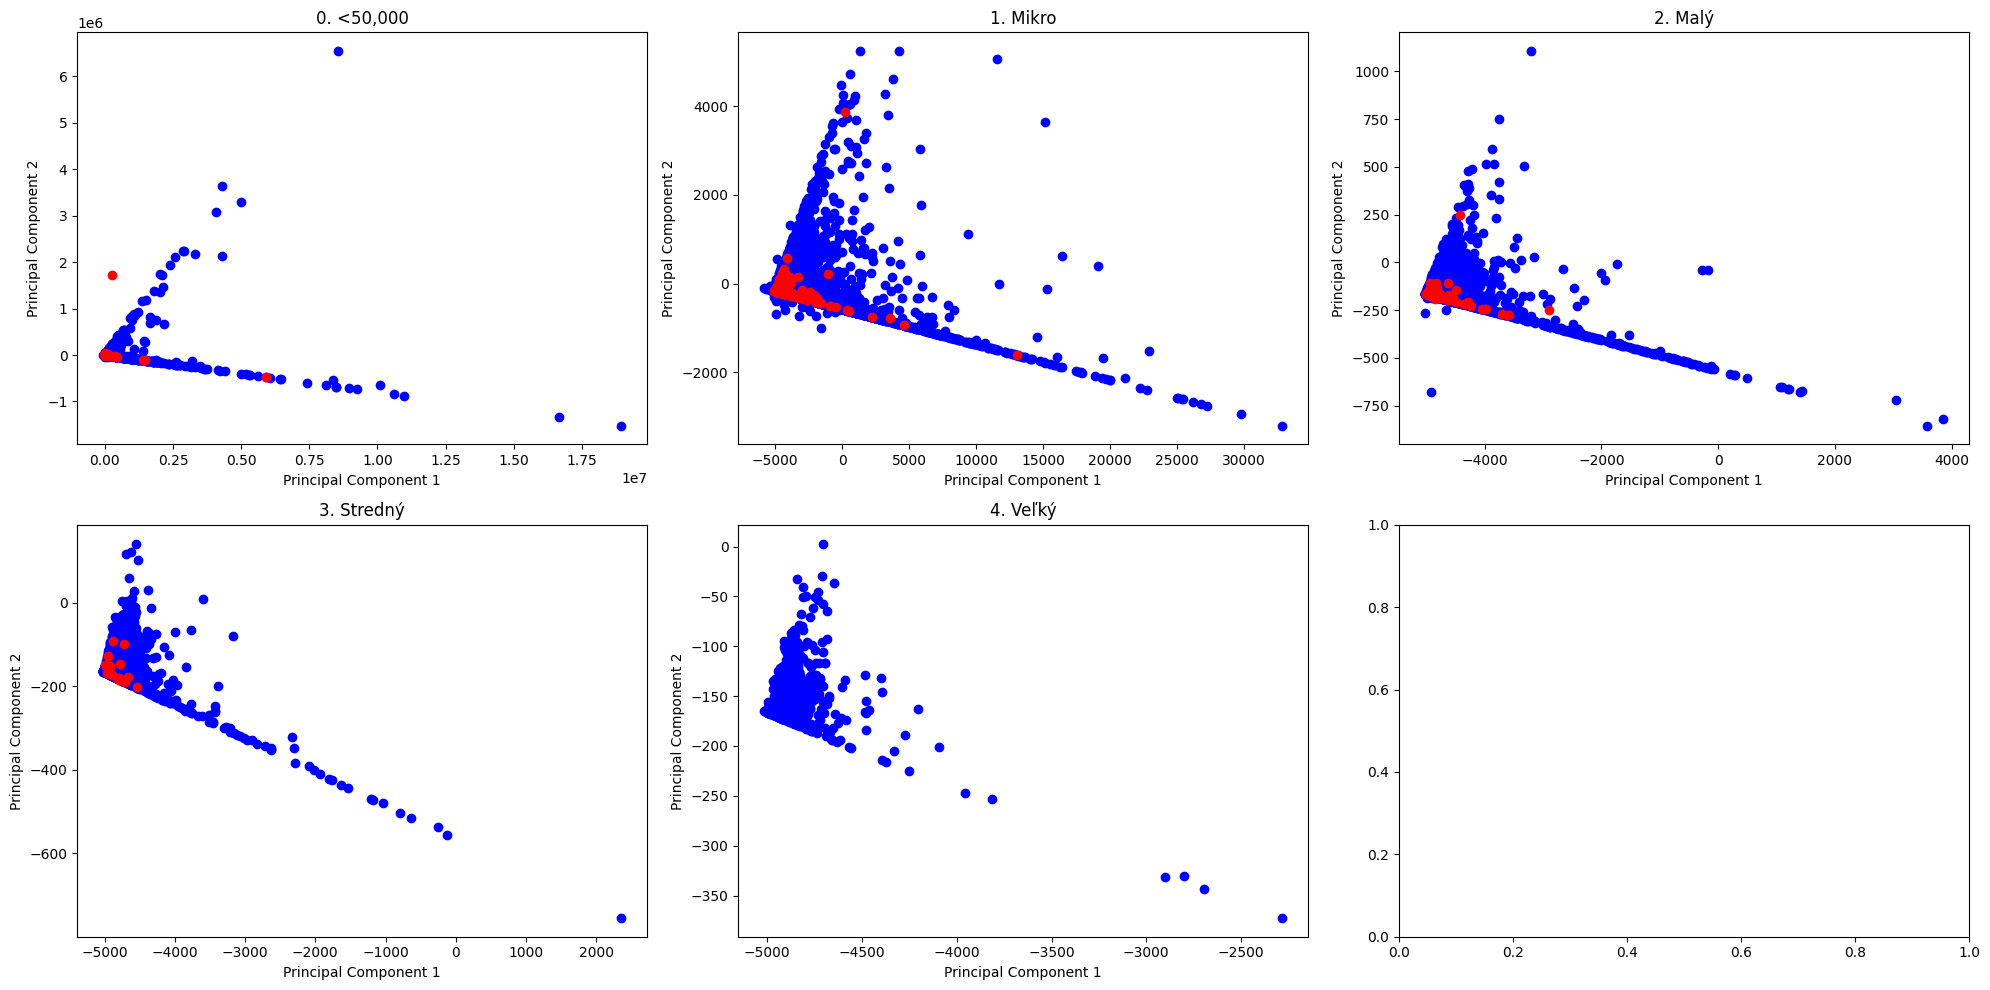

In [48]:
DISTRESS_CRITERIA = ['DPHZ_vat_registration_cancelled',
 'DPHZ_vat_registration_cancelled_1y_off',
 'DPHZ_vat_registration_cancelled_2y_off',
 'RUZ_indirect_criterion',
 'RUZ_indirect_criterion_1y_off',
 'RUZ_indirect_criterion_2y_off',
 'RU_konkurz',
 'RU_konkurz_1y_off',
 'RU_konkurz_2y_off',
 'RU_ostatne_konania',
 'RU_ostatne_konania_1y_off',
 'RU_ostatne_konania_2y_off',
 'RUZ_cancelled',
 'RUZ_cancelled_1y_off',
 'RUZ_cancelled_2y_off']

DISTRESS_CRITERION = 'RUZ_cancelled_2y_off'

fig, axes = plt.subplots(ncols=3, nrows=len(SAL_CLASSES) // 3 + 1, figsize=(20, 10))
axes = axes.flatten()

data_group = financial_ratios_table.query('year == 2018 and is_outlier == False and period_length == 12').sort_values(DISTRESS_CRITERION, ascending=True)

data = fill_missing_values_mean(data_group[FINANCIAL_RATIOS].values)
            
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)


colors = ['blue', 'red']  # Define colors for RUZ_cancelled categories

for i, sal_class in enumerate(SAL_CLASSES):
    ax = axes[i]
    for j, ruz_cancelled in enumerate([False, True]):
        class_indices = (data_group['sal_class'] == sal_class) & (data_group[DISTRESS_CRITERION] == ruz_cancelled)
        ax.scatter(pca_data[class_indices, 0], pca_data[class_indices, 1], label=f'{DISTRESS_CRITERION}={ruz_cancelled}', color=colors[j])


    ax.set_title(f'{sal_class}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [49]:
financial_ratios_table

,financial_report_id,financial_statement_id,financial_report_order_number,entity_id,approved_date,entity_ico,year,month,financial_report_template_id,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,period_length,financial_report_id.1,financial_report_template_id.1,total_assets,non_current_assets,intangible_assets,total_non_current_tangible_assets,land_and_buildings,separate_movable_assets_and_sets_of_movable_assets,other_long_term_tangible_assets,adjustment_item_for_acquired_assets,total_long_term_financial_assets,bank_balances_with_maturity_longer_than_one_year,current_assets,inventories,non_current_claims,current_claims,trade_receivables,social_security_tax_receivables_and_grants,financial_assets,other_financial_accounts,cash_and_bank_balances,total_owners_equity_and_liabilities,owners_equity,share_capital,share_capital_and_changes_in_share_capital,claims_for_subscribed_owners_equity,capital_funds,valuation_differences,undivided_profit_or_unpaid_loss_from_previous_years,profit_for_the_reporting_period_after_tax,liabilities,long_term_liabilities_excluding_reserves_and_loans,long_term_reserves,long_term_bank_loans,total_short_term_liabilities_excluding_reserves_loans_and_advances,...,L2,L1,CF_CL,CASH_TA,SAL_TA,TL_SAL,INV_COST,INV_SAL,CC_SAL,TA_SAL,TL_TA,CF_TL,CL_TA,NCL_TA,EQ_TL,EQ_TA,EBIT_INT,CL_CC,ROE,EAT_TA,ROA_BRUTTO,CF_TA,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,SOCLIAB_SAL,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled,DPHZ_vat_registration_cancelled_1y_off,DPHZ_vat_registration_cancelled_2y_off,RUZ_indirect_criterion,RUZ_indirect_criterion_1y_off,RUZ_indirect_criterion_2y_off,RU_konkurz,RU_konkurz_1y_off,RU_konkurz_2y_off,RU_ostatne_konania,RU_ostatne_konania_1y_off,RU_ostatne_konania_2y_off,cancellation_year,RUZ_cancelled,RUZ_cancelled_1y_off,RUZ_cancelled_2y_off,sal_class,is_outlier
0,4890214,2575566,2,25527,2015-07-31,671.0,2014,1,699.0,"Kerametal, akciová spoločnosť,",1970-02-02,NaN,46180.0,NaN,12,4890214,699.0,5175248.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,0.0,5174843.0,0.0,0.0,5173364.0,5173364.0,0.0,1479.0,0.0,1479.0,5175248.0,3807863.0,10884786.0,10884786.0,0.0,-6657984.0,131090.0,131090.0,-550029.0,1367385.0,1255.0,0.0,0.0,1366130.0,...,3.787958,0.001083,-0.400976,0.000286,0.001227,215.336220,0.0,0.0,814.702992,293399.886614,0.264216,-0.400608,0.263974,0.000243,2.784778,0.735784,NaN,2.640700e-01,-0.144446,-0.106281,-0.106188,-0.105847,-86.265512,-86.618740,-49.939078,-0.106281,-0.106281,0.217953,6.666929,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,"0. <50,000",False
1,5392251,2976863,2,25527,2016-12-31,671.0,2015,1,699.0,"Kerametal, akciová spoločnosť, Bratislava",1970-02-02,NaN,46180.0,NaN,12,5392251,699.0,5174845.0,222.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0,0.0,5174245.0,0.0,0.0,5172377.0,5172377.0,0.0,1868.0,0.0,1868.0,5174845.0,3480567.0,10884786.0,10884786.0,0.0,-7076917.0,0.0,0.0,-327302.0,1694278.0,1255.0,0.0,0.0,1693023.0,...,3.056217,0.001103,-0.193040,0.000361,0.000702,466.357831,0.0,0.0,1423.720617,512783.980182,0.327407,-0.192898,0.327164,0.000243,2.054307,0.672593,NaN,3.273201e-01,-0.094037,-0.063249,-0.063156,-0.063156,-89.959262,-90.091385,-32.236974,-0.063249,-0.063249,0.000000,11.652904,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,"0. <50,000",False
2,5887438,3375702,2,25527,2017-12-27,671.0,2016,1,699.0,"Kerametal, akciová spoločnosť, Bratislava",1970-02-02,NaN,46180.0,NaN,12,5887438,699.0,14901.0,222.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0,0.0,14679.0,0.0,0.0,13645.0,13645.0,0.0,1034.0,0.0,1034.0,14901.0,-1683081.0,10884786.0,10884786.0,0.0,-7383074.0,-21145.0,-21145.0,-5163648.0,1697982.0,0.0,0.0,0.0,1697982.0,...,0.008645,0.000609,-3.040767,0.069391,0.133817,851.545637,0.0,0.0,6.843029,2690.250752,113.950876,-3.040767,113.950876,0.000000,-0.991224,-112.950876,NaN,1.244399e+02,NaN,-346.5303

In [50]:
financial_ratios_table.to_csv('../../DATA/FINAL/training_data.csv', index = False)